 100% |█████████████████████| 1/1 [40.9ms elapsed, 0s remaining, 25.4 samples/s] 


07/10/2024 12:41:59 - INFO - eta.core.utils -    100% |█████████████████████| 1/1 [40.9ms elapsed, 0s remaining, 25.4 samples/s] 



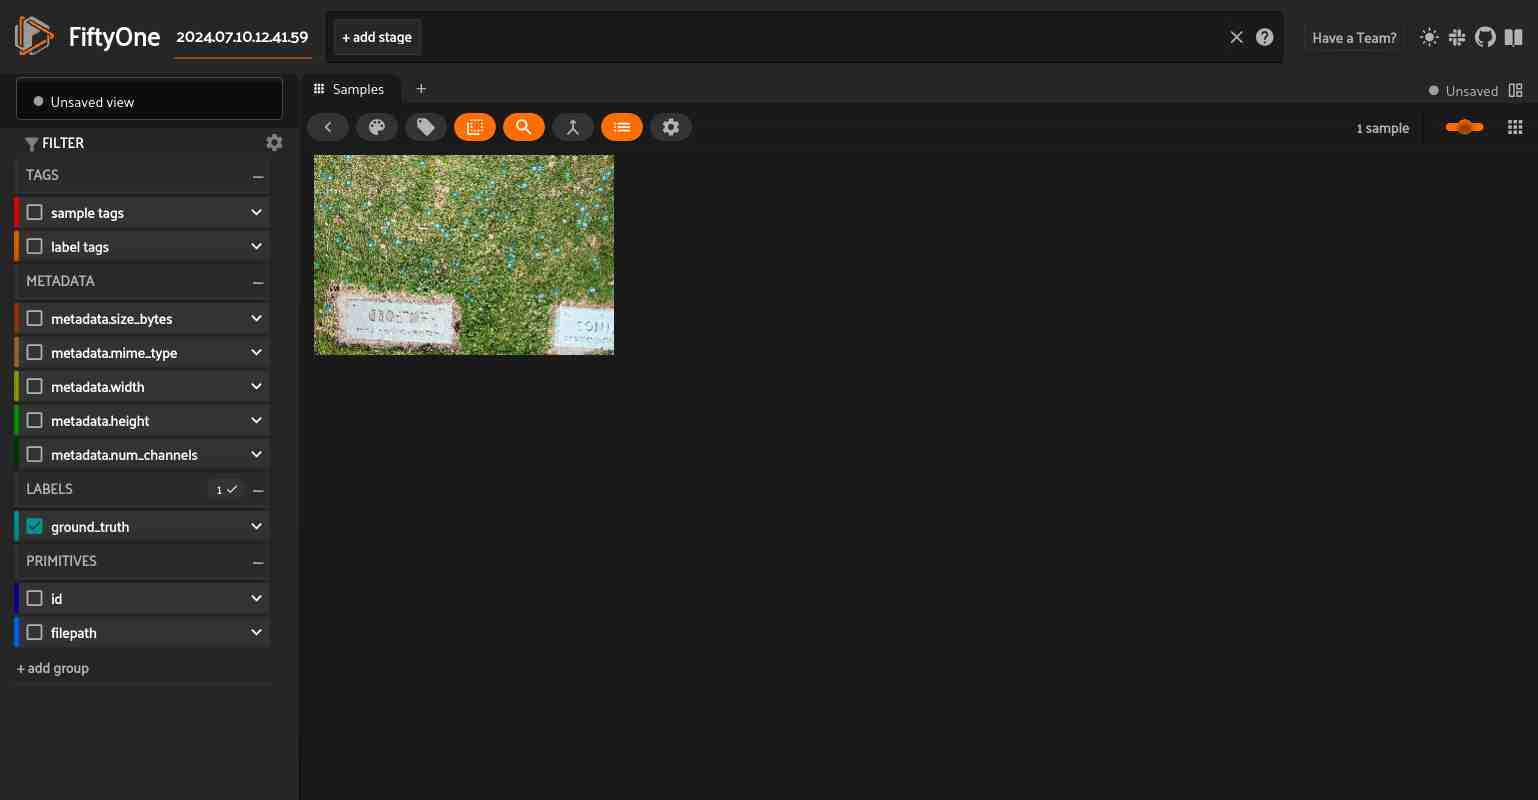

Performing prediction on 70 slices.
Detections predicted without slicing: 10
Detections predicted with slicing: 81
 100% |█████████████████████| 1/1 [1.5m elapsed, 0s remaining, 0.0 samples/s] 


07/10/2024 12:43:43 - INFO - eta.core.utils -    100% |█████████████████████| 1/1 [1.5m elapsed, 0s remaining, 0.0 samples/s] 


In [22]:

import os
os.getcwd()



#now get fiftyone
import fiftyone as fo
from fiftyone import ViewField as F




# Import annotated test image into fiftyone
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.YOLOv5Dataset,
    yaml_path = "datasets/test_image/test.yaml"
)


# open test image instance
session = fo.launch_app(dataset)



# import required sahi functions
from sahi import AutoDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict



# specify AI detection model
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path='AIggregation_yolov5m/weights/best.pt',
    confidence_threshold=0.25,
    device="cpu", # or 'cuda:0'
)




# do simple yolo prediction without slicing
result = get_prediction(dataset.first().filepath, detection_model)


# now do sliced prediction with sahi
sliced_result = get_sliced_prediction(
    dataset.first().filepath,
    detection_model,
    slice_height = 608,
    slice_width = 608,
    overlap_height_ratio = 0.1,
    overlap_width_ratio = 0.1
)


# now compare number of detections with and without slicing
num_sliced_dets = len(sliced_result.to_fiftyone_detections())
num_orig_dets = len(result.to_fiftyone_detections())

print(f"Detections predicted without slicing: {num_orig_dets}")
print(f"Detections predicted with slicing: {num_sliced_dets}")






# run different slicing parameters

def predict_with_slicing(sample, label_field, **kwargs):
    result = get_sliced_prediction(
        sample.filepath, detection_model, verbose=0, **kwargs
    )
    sample[label_field] = fo.Detections(detections=result.to_fiftyone_detections())




kwargs = {"overlap_height_ratio": 0.2, "overlap_width_ratio": 0.2}

for sample in dataset.iter_samples(progress=True, autosave=True):
    predict_with_slicing(sample, label_field="small_slices", slice_height=304, slice_width=304, **kwargs)
    predict_with_slicing(sample, label_field="medium slices", slice_height=456, slice_width=456, **kwargs)
    predict_with_slicing(sample, label_field="large_slices", slice_height=608, slice_width=608, **kwargs)


session.show()


 100% |█████████████████████| 1/1 [76.1ms elapsed, 0s remaining, 13.6 samples/s] 



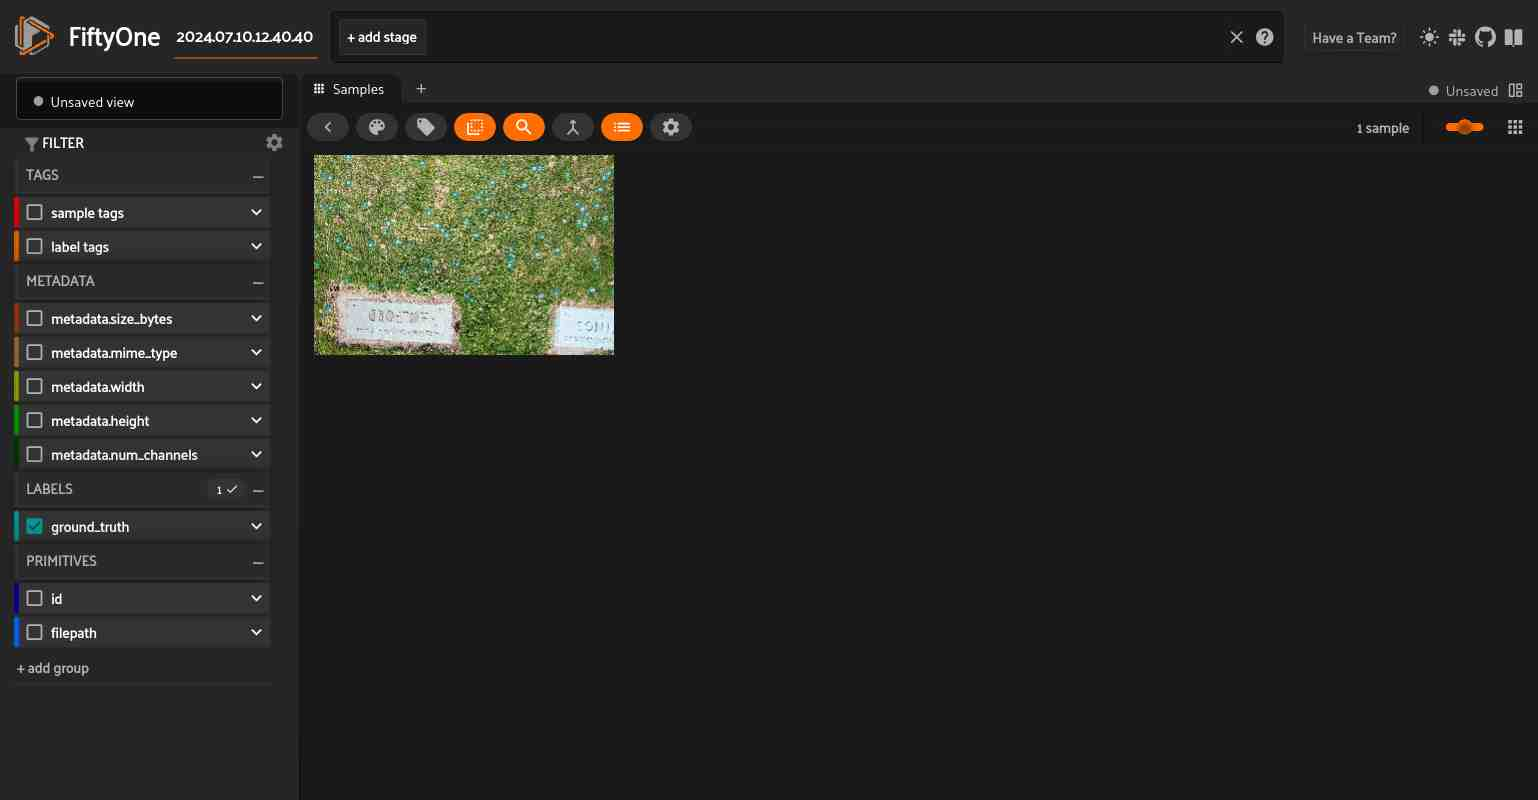

In [20]:

import os
os.getcwd()




#now get fiftyone
import fiftyone as fo




# Import the dataset
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.YOLOv5Dataset,
    yaml_path = "datasets/test_image/test.yaml"
)


session = fo.launch_app(dataset)